In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [6]:
df = pd.read_csv("음주운전교통사고.csv")
df

,행정구역별,음주운전 교통사고발생건수,교통사고 발생건수
0,전국,15708,229600
1,서울특별시,2190,39258
2,부산광역시,636,12992
3,대구광역시,702,14536
4,인천광역시,770,8698
5,광주광역시,549,8169
6,대전광역시,472,8337
7,울산광역시,373,4347
8,세종특별자치시,89,922
9,경기도,4140,55463


## 19년도 전국 교통사고 발생 중 음주운전 발생 비율

In [7]:
df["시단위 음주교통사고 발생 비율(%)"] = df["음주운전 교통사고발생건수"] / df["교통사고 발생건수"]*100
df["시단위 음주교통사고 발생 비율(%)"] = df["시단위 음주교통사고 발생 비율(%)"].round(2)
df


,행정구역별,음주운전 교통사고발생건수,교통사고 발생건수,시단위 음주교통사고 발생 비율(%)
0,전국,15708,229600,6.84
1,서울특별시,2190,39258,5.58
2,부산광역시,636,12992,4.90
3,대구광역시,702,14536,4.83
4,인천광역시,770,8698,8.85
5,광주광역시,549,8169,6.72
6,대전광역시,472,8337,5.66
7,울산광역시,373,4347,8.58
8,세종특별자치시,89,922,9.65
9,경기도,4140,55463,7.46


## 서울시 구별 발생현황

In [8]:
seoul_df = pd.read_csv("서울시 시군구별 음주운전.csv")
seoul_df = seoul_df.drop([seoul_df.index[0]])
seoul_df

,기간,지역,발생건수,사망자수,부상자수
1,2019,종로구,48,-,78
2,2019,중구,30,-,42
3,2019,용산구,73,1,127
4,2019,성동구,61,-,92
5,2019,광진구,62,1,100
6,2019,동대문구,63,-,86
7,2019,중랑구,74,-,102
8,2019,성북구,62,1,106
9,2019,강북구,60,1,102
10,2019,도봉구,35,1,52


In [9]:
seoul_locate_df = pd.read_csv("서울시 시군구별 위,경도값.csv",encoding='cp949')
seoul_locate_df

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


In [10]:
seoul_locate_df = seoul_locate_df.drop(['순번','시군구코드','시군구명_영문','ESRI_PK'],axis=1)
seoul_locate_df = seoul_locate_df.rename({'시군구명_한글':'지역'},axis='columns')
seoul_locate_df

,지역,위도,경도
0,도봉구,37.665861,127.031767
1,은평구,37.617612,126.922700
2,동대문구,37.583801,127.050700
3,동작구,37.496504,126.944307
4,금천구,37.460097,126.900155
5,구로구,37.495486,126.858121
6,종로구,37.599100,126.986149
7,강북구,37.646995,127.014716
8,중랑구,37.595379,127.093967
9,강남구,37.495985,127.066409


In [11]:
seoul_df = seoul_df.merge(seoul_locate_df)
seoul_df.head()

,기간,지역,발생건수,사망자수,부상자수,위도,경도
0,2019,종로구,48,-,78,37.599100,126.986149
1,2019,중구,30,-,42,37.557945,126.994190
2,2019,용산구,73,1,127,37.528582,126.981987
3,2019,성동구,61,-,92,37.550675,127.040962
4,2019,광진구,62,1,100,37.548144,127.085753


In [12]:
for i in seoul_df.index:
    sub_long = seoul_df.loc[i,'경도']
    sub_lat = seoul_df.loc[i,'위도']
    print(seoul_df.loc[i,'지역'],sub_lat,sub_long)

종로구 37.5990998 126.98614930000001
중구 37.557945200000006 126.99419040000001
용산구 37.528582 126.98198700000002
성동구 37.550675299999995 127.0409622
광진구 37.5481445 127.0857528
동대문구 37.5838012 127.0507003
중랑구 37.5953795 127.0939669
성북구 37.606991 127.0232185
강북구 37.646995399999994 127.0147158
도봉구 37.6658609 127.0317674
노원구 37.655264 127.07712009999999
은평구 37.6176125 126.9227004
서대문구 37.5820369 126.93566650000001
마포구 37.562290600000004 126.9087803
양천구 37.5219 126.8575
강서구 37.5657617 126.8226561
구로구 37.4954856 126.858121
금천구 37.460096899999996 126.90015459999998
영등포구 37.520641 126.91392420000001
동작구 37.4965037 126.94430729999999
관악구 37.465399299999994 126.9438071
서초구 37.4769528 127.03781029999999
강남구 37.4959854 127.0664091
송파구 37.5048534 127.1144822
강동구 37.549207700000004 127.1464824


<AxesSubplot:xlabel='경도', ylabel='위도'>

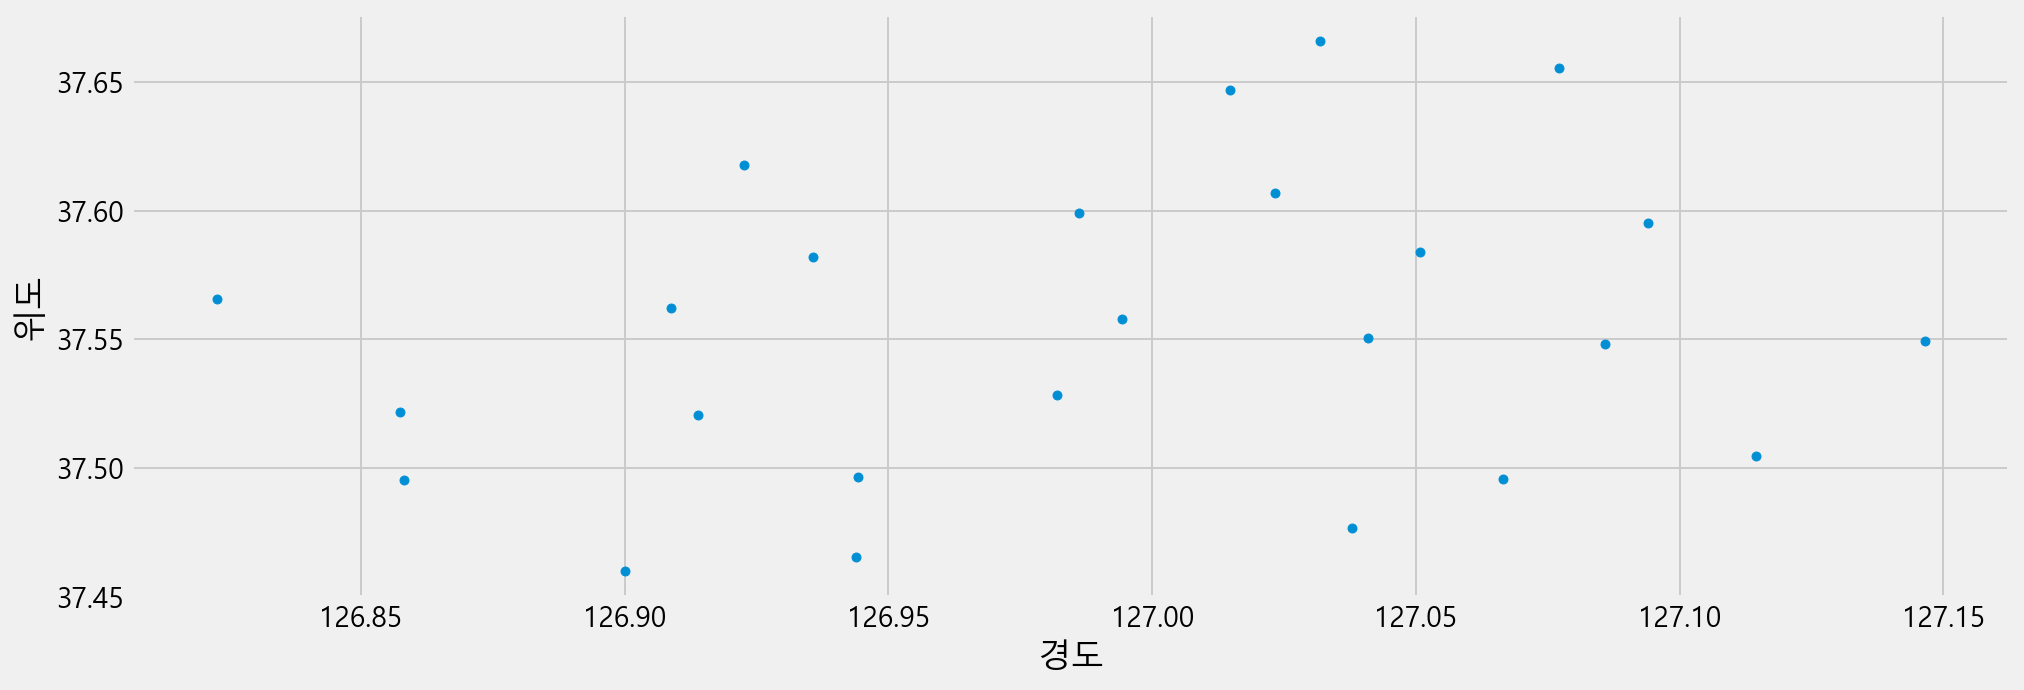

In [13]:
seoul_df[["위도","경도"]].plot.scatter(x="경도",y="위도",figsize=(15,5))

In [14]:
import folium

In [15]:
long = seoul_df["경도"].mean()
lat = seoul_df["위도"].mean()

In [16]:
m = folium.Map(location=[lat, long])


for i in seoul_df.index[:]:
    sub_lat = seoul_df.loc[i,"위도"]
    sub_long = seoul_df.loc[i,"경도"]
    

    title = "'"+seoul_df.loc[i,"지역"]+"' 에서 발생한 음주 교통사고 발생건수  :  "+ seoul_df.loc[i,"발생건수"]+"/  부상자 수 : "  + seoul_df.loc[i,"부상자수"] + "/  사망자 수 : "+ seoul_df.loc[i,"사망자수"]
    
    folium.Marker(
    [sub_lat, sub_long],tooltip = title).add_to(m)
m

In [17]:
geo_path = 'seoul_municipalities_geo_simple.json'

In [18]:
import json
geo_json = json.load(open(geo_path,encoding = 'utf-8'))
geo_json["features"][0]["properties"]['name']

'강동구'

In [19]:
seoul_df["지역"]

0      종로구
1       중구
2      용산구
3      성동구
4      광진구
5     동대문구
6      중랑구
7      성북구
8      강북구
9      도봉구
10     노원구
11     은평구
12    서대문구
13     마포구
14     양천구
15     강서구
16     구로구
17     금천구
18    영등포구
19     동작구
20     관악구
21     서초구
22     강남구
23     송파구
24     강동구
Name: 지역, dtype: object

In [20]:
seoul_df["발생건수"] = seoul_df["발생건수"].astype(int)

In [21]:
seoul_df["사망자수"] = seoul_df["사망자수"].replace(to_replace='-',value='0')
seoul_df["사망자수"] = seoul_df["사망자수"].astype(int)

In [22]:
seoul_df["부상자수"] = seoul_df["부상자수"].astype(int)

In [23]:
m = folium.Map([lat,long],zoom_start=11)

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=seoul_df,
    columns=['지역','발생건수','부상자수','사망자수'],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="구별 음주운전 교통사고 발생수",
).add_to(m)
m

In [24]:
m = folium.Map([lat,long],zoom_start=11)

folium.Choropleth(
    geo_data=geo_json,
    name="choropleth",
    data=seoul_df,
    columns=['지역','발생건수','부상자수','사망자수'],
    key_on="feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="구별 음주운전 교통사고 발생수",
).add_to(m)

seoul_df["발생건수"] = seoul_df["발생건수"].astype(str)
seoul_df["부상자수"] = seoul_df["부상자수"].astype(str)
seoul_df["사망자수"] = seoul_df["사망자수"].astype(str)


for i in seoul_df.index[:]:
    sub_lat = seoul_df.loc[i,"위도"]
    sub_long = seoul_df.loc[i,"경도"]
    

    title = "'"+seoul_df.loc[i,"지역"]+"' 에서 발생한 음주 교통사고 발생건수  :  "+ seoul_df.loc[i,"발생건수"]+" /  부상자 수 : "  + seoul_df.loc[i,"부상자수"] + " /  사망자 수 : "+ seoul_df.loc[i,"사망자수"]
    
    folium.Marker(
    [sub_lat, sub_long],tooltip = title).add_to(m)
m


In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
plt.xkcd()
seoul=gpd.read_file('seoul_municipalities_geo.json')

In [26]:
seoul.head()

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry
0,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.01985 37.70088, 127.02217 37.699..."
1,11380,은평구,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.95174 37.65489, 126.95188 37.654..."
2,11230,동대문구,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07110 37.60733, 127.07119 37.606..."
3,11590,동작구,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.95472 37.51604, 126.95556 37.515..."
4,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.87994 37.48606, 126.88034 37.485..."


In [27]:
seoul_df = seoul_df.rename({'지역':'SIG_KOR_NM'},axis='columns')
test = seoul_df.drop(["기간","위도","경도"],axis=1)
test.head()

,SIG_KOR_NM,발생건수,사망자수,부상자수
0,종로구,48,0,78
1,중구,30,0,42
2,용산구,73,1,127
3,성동구,61,0,92
4,광진구,62,1,100


In [28]:
merge_data = pd.merge(seoul,test,on='SIG_KOR_NM')

In [29]:
merge_data["location_data"] = merge_data["SIG_KOR_NM"].map(str) +' \n '+ merge_data["발생건수"].map(str) +'건/ '+merge_data["부상자수"].map(str) +'명/ '+merge_data["사망자수"].map(str)+'명'
merge_data.head()

,SIG_CD,SIG_KOR_NM,SIG_ENG_NM,ESRI_PK,SHAPE_AREA,SHAPE_LEN,geometry,발생건수,사망자수,부상자수,location_data
0,11320,도봉구,Dobong-gu,0,0.002110,0.239901,"POLYGON ((127.01985 37.70088, 127.02217 37.699...",35,1,52,도봉구 \n 35건/ 52명/ 1명
1,11380,은평구,Eunpyeong-gu,1,0.003041,0.327143,"POLYGON ((126.95174 37.65489, 126.95188 37.654...",77,0,126,은평구 \n 77건/ 126명/ 0명
2,11230,동대문구,Dongdaemun-gu,2,0.001453,0.182837,"POLYGON ((127.07110 37.60733, 127.07119 37.606...",63,0,86,동대문구 \n 63건/ 86명/ 0명
3,11590,동작구,Dongjak-gu,3,0.001670,0.237796,"POLYGON ((126.95472 37.51604, 126.95556 37.515...",67,0,144,동작구 \n 67건/ 144명/ 0명
4,11545,금천구,Geumcheon-gu,4,0.001325,0.211649,"POLYGON ((126.87994 37.48606, 126.88034 37.485...",76,2,117,금천구 \n 76건/ 117명/ 2명


In [30]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/H2GTRE.TTF").get_name()
rc('font', family=font_name)

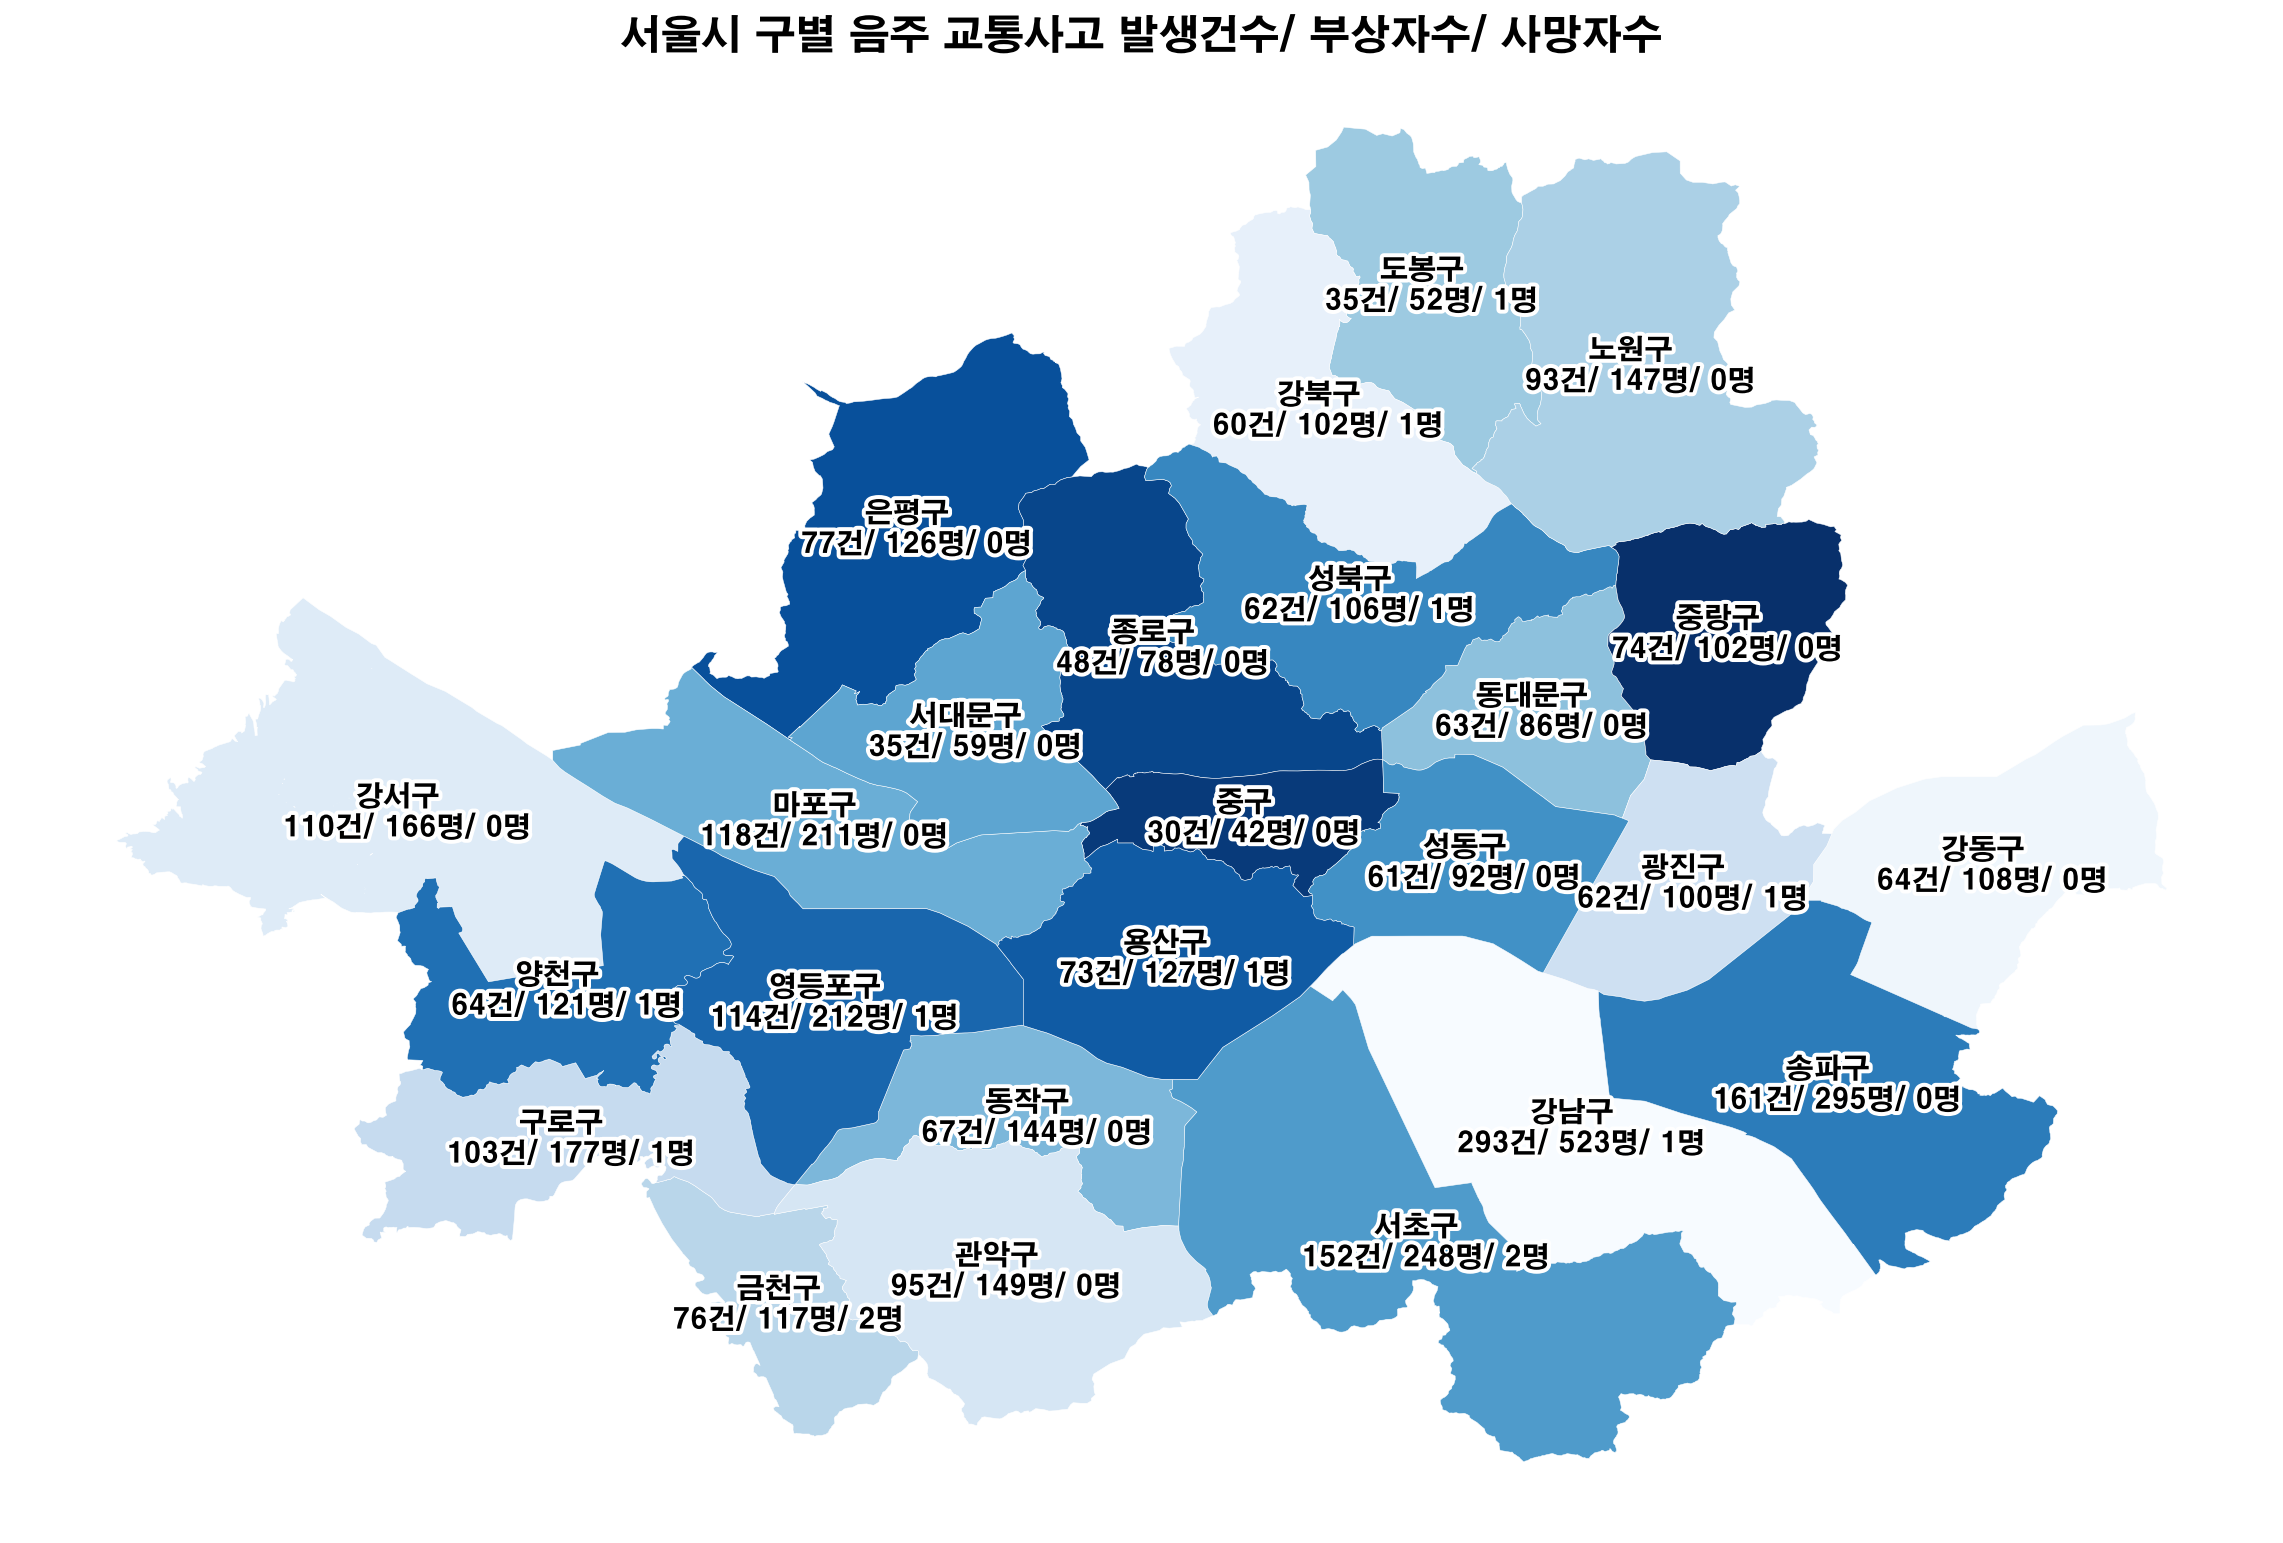

In [31]:
final_pic=merge_data.plot( figsize=(18,15),linewidth=0.25, edgecolor='white', column='location_data',cmap='Blues')
plt.title("서울시 구별 음주 교통사고 발생건수/ 부상자수/ 사망자수")
for index,row in merge_data.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    plt.annotate(row['location_data'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center')
    plt.axis('off')
plt.show()

In [32]:
seoul_df = seoul_df.rename({'SIG_KOR_NM':'지역'},axis='columns')
seoul_df = seoul_df[["지역","발생건수","사망자수","부상자수"]]
seoul_df.head()

,지역,발생건수,사망자수,부상자수
0,종로구,48,0,78
1,중구,30,0,42
2,용산구,73,1,127
3,성동구,61,0,92
4,광진구,62,1,100


In [33]:
seoul_df["발생건수"] = seoul_df["발생건수"].astype(int)
seoul_df["음주운전 발생비율 (%)"] = (seoul_df["발생건수"]/2190) * 100 # 2190: 19년에 서울시에서 발생한 음주 교통사고 수
seoul_df = seoul_df.round(2)
seoul_df.head()

,지역,발생건수,사망자수,부상자수,음주운전 발생비율 (%)
0,종로구,48,0,78,2.19
1,중구,30,0,42,1.37
2,용산구,73,1,127,3.33
3,성동구,61,0,92,2.79
4,광진구,62,1,100,2.83


In [34]:
plt.style.use("default")

In [35]:
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
plt.style.use("fivethirtyeight")

In [36]:
seoul_df = seoul_df.sort_values(by=["발생건수"],ascending=False)
seoul_df.head()

,지역,발생건수,사망자수,부상자수,음주운전 발생비율 (%)
22,강남구,293,1,523,13.38
23,송파구,161,0,295,7.35
21,서초구,152,2,248,6.94
13,마포구,118,0,211,5.39
18,영등포구,114,1,212,5.21


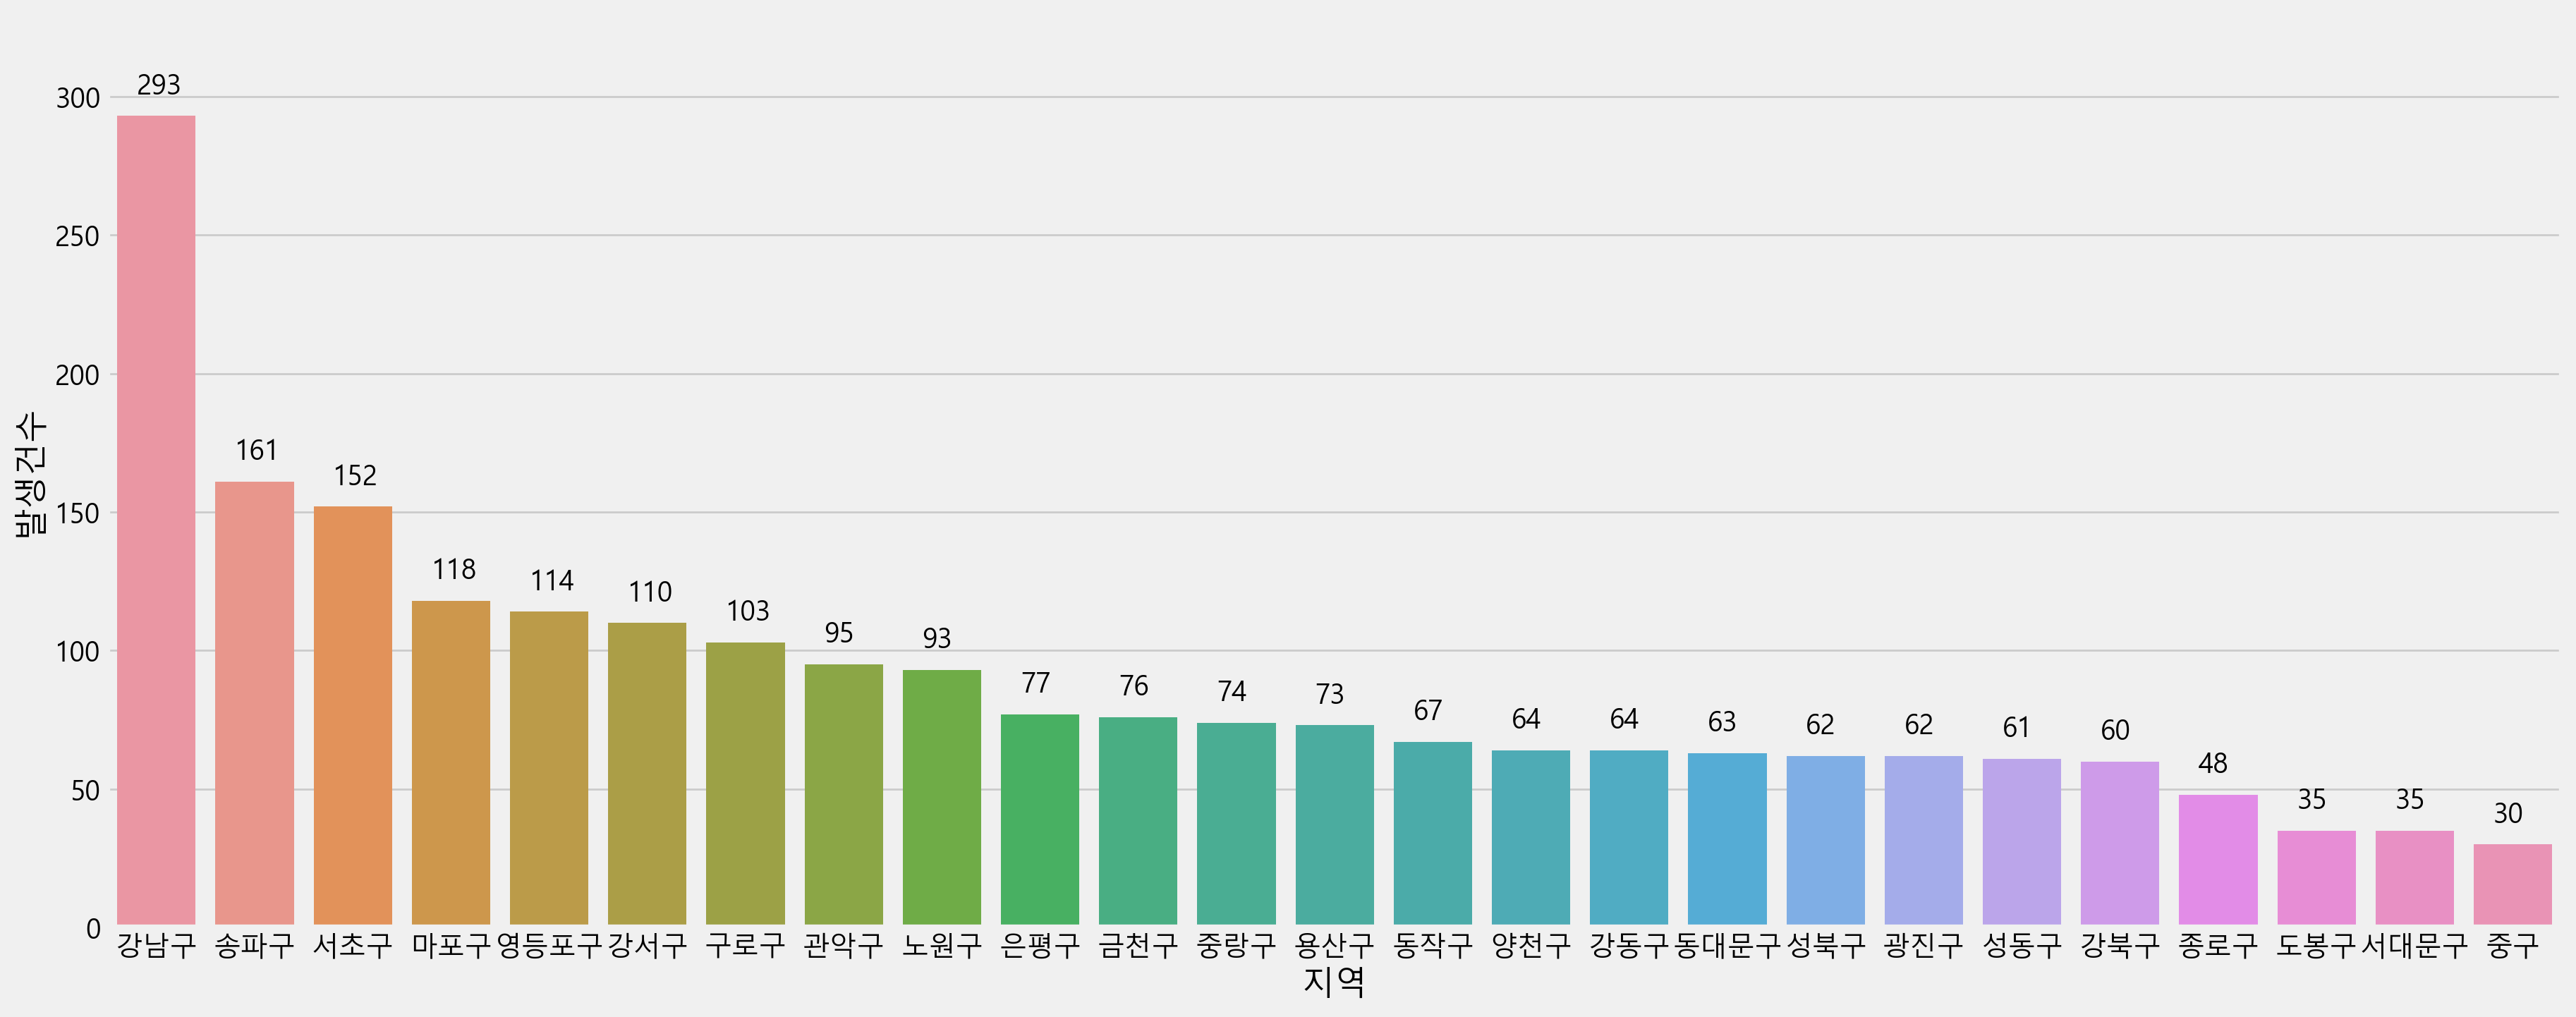

In [37]:
plt.figure(figsize=(20,8))
plt.ylim(0, 330)
sns.barplot(data = seoul_df, x = '지역', y = '발생건수')

for index, value in enumerate(seoul_df["발생건수"]):
    plt.text(index-0.2,value+8,value)
plt.show()